# 3a. Data Cleaning and EDA

In [206]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split

In [4]:
f = open('ultimate_data_challenge.json')
data = json.load(f)

In [13]:
data[0]

{'city': "King's Landing",
 'trips_in_first_30_days': 4,
 'signup_date': '2014-01-25',
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'surge_pct': 15.4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2,
 'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0}

In [15]:
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
df.shape

(50000, 12)

In [42]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int32
dtype: object

In [133]:
# Convert signup date and last trip date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'], yearfirst=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], yearfirst=True)

# Convert ultimate black to binary
df['ultimate_black_user'] = np.where(df['ultimate_black_user']==True, 1, 0)

In [134]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                int32
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int32
dtype: object

In [24]:
len(df)

50000

In [192]:
total_na = df.isna().sum()
perc_na = total_na/len(df)*100

pd.DataFrame(
    {'Total NA':total_na, '% NA':perc_na}
)

,Total NA,% NA
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_rating_of_driver,8122,16.244
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
avg_rating_by_driver,201,0.402


In [31]:
df['last_trip_date'].sort_values(ascending=False)

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
           ...    
23907   2014-01-01
47804   2014-01-01
11578   2014-01-01
11573   2014-01-01
15359   2014-01-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

The latest trip date is 7/1/2014, so a user will be considered active if they took a trip within the range of 6/1/2014 - 7/1/2014.

In [39]:
# How many users were active in the last 30 days?
mask = df['last_trip_date']>'2014-06-01'
print(len(df[mask]), 'or', round(len(df[mask])/len(df)*100, 2), '% of users were active in the last 30 days')

# Add this column to df
df['active'] = np.where(mask, 1, 0)
df.head()

18310 or 36.62 % of users were active in the last 30 days


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## 1. Categorical Features

In [144]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                int32
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int32
dtype: object

In [138]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [145]:
cat_cols = ['city', 'phone', 'ultimate_black_user']
num_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver',
            'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist']

In [86]:
city_idx = df['city'].value_counts().index.tolist()
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [87]:
phone_idx = df['phone'].value_counts().index.tolist()
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [140]:
black_idx = df['ultimate_black_user'].value_counts().index.tolist()
df['ultimate_black_user'].value_counts()

0    31146
1    18854
Name: ultimate_black_user, dtype: int64

In [93]:
def cat_bar(cols, idx, y, data, figsize=(20,30)):
    """Plot bar graphs that: a) compare mean values of a target to different levels of a column
    b) compare different levels of a column to different levels of a target"""
    fig, axes = plt.subplots(len(cols),2, figsize=figsize)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for i, col in enumerate(zip(cols,idx)):
        ax = axes.flatten()[i]
        plot1 = sns.barplot(x=col[0], y=y, data=data, order=col[1], ax=axes[i,0])
        plot1.set_xticklabels(plot1.get_xticklabels(), rotation=0)
        plot1.set_title('Mean active status')
                
        df_plot = data.groupby([col[0], y]).size().reset_index().pivot(
            columns=y, index=col[0], values=0).reindex(col[1])
        df_plot.plot(kind='bar', rot=0, stacked=True, ax=axes[i,1],
                    title='Total count separated by active status')

In [141]:
cat_idx = [city_idx, phone_idx, black_idx]

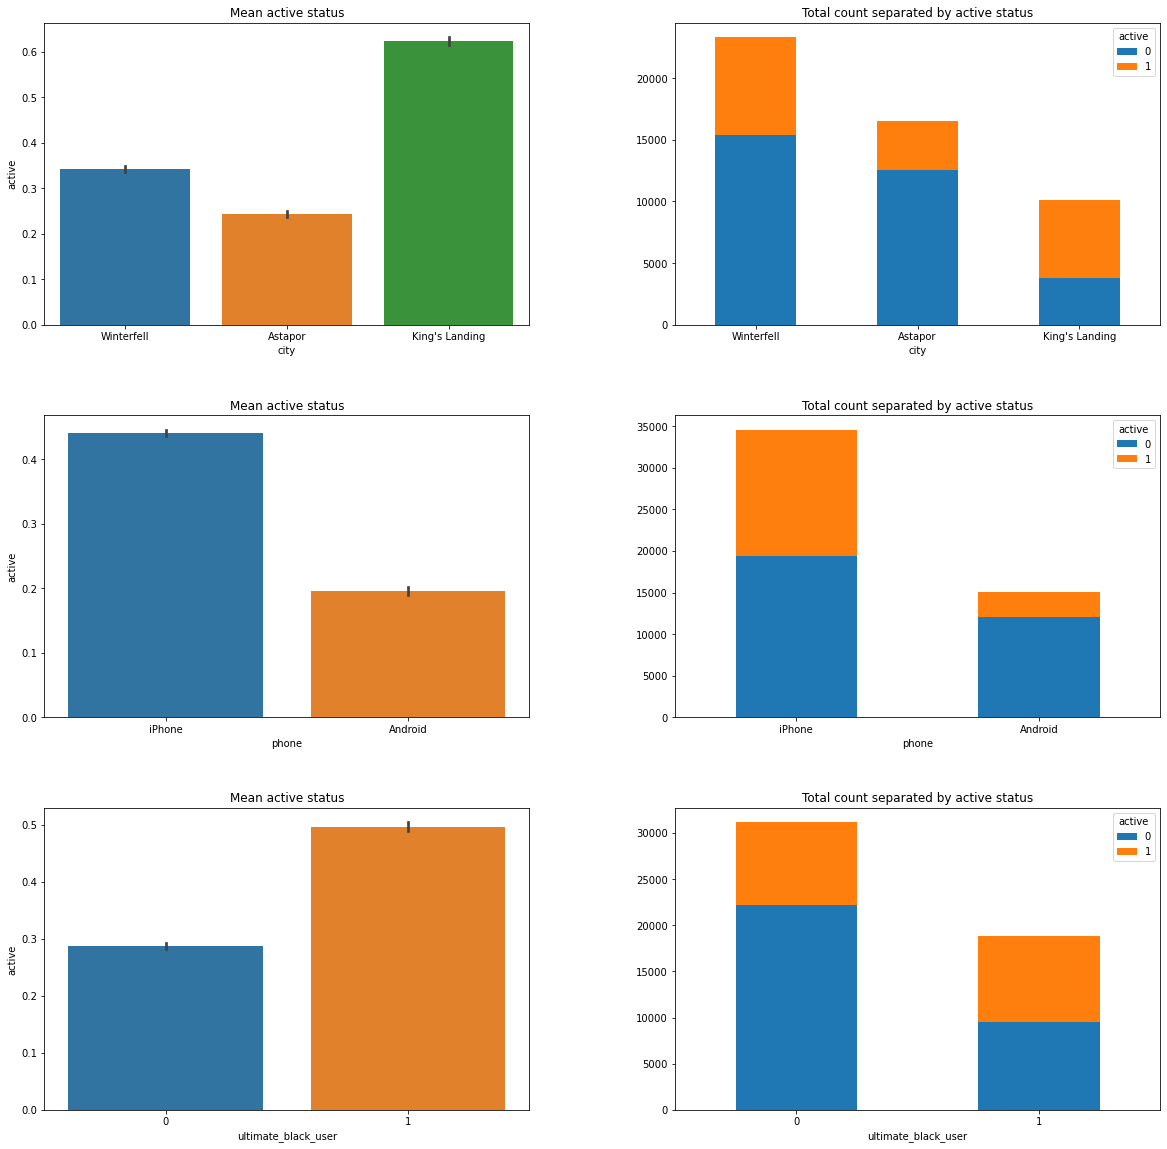

In [142]:
cat_bar(cat_cols, cat_idx, 'active', df, figsize=(20,20))

- Although most users are from Winterfell, those from King's Landing are most likely to be active.
- iPhone users make up the bulk of the userbase and are also more likely to be active than android users.
- Most users are not ultimate black users, but those that are are more likely to be active.

## 2. Encode and Impute Categorical Features

In [155]:
df[cat_cols].isna().sum()

city                   0
phone                  0
ultimate_black_user    0
dtype: int64

In [156]:
df.phone.isna().sum(), df.phone.isna().sum()/len(df.phone)*100

(0, 0.0)

In [148]:
df.phone.value_counts()/len(df)*100

iPhone     69.164
Android    30.044
Name: phone, dtype: float64

Only 396, or 0.79%, of phone entries are missing. Approximately 2/3 of users are iPhone users, so missing values can be imputed with the mode.

In [153]:
# Impute phone column
df['phone'].fillna('iPhone', inplace=True)

In [157]:
# Encode phone
df['iPhone'] = np.where(df['phone']=='iPhone', 1, 0)
df.drop(columns='phone', inplace=True)

In [158]:
# Encode city
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [161]:
df.shape

(50000, 13)

In [166]:
df = pd.get_dummies(df)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,0,1


In [165]:
df.shape

(50000, 15)

## 3. Numerical (and Encoded Categorical) Features

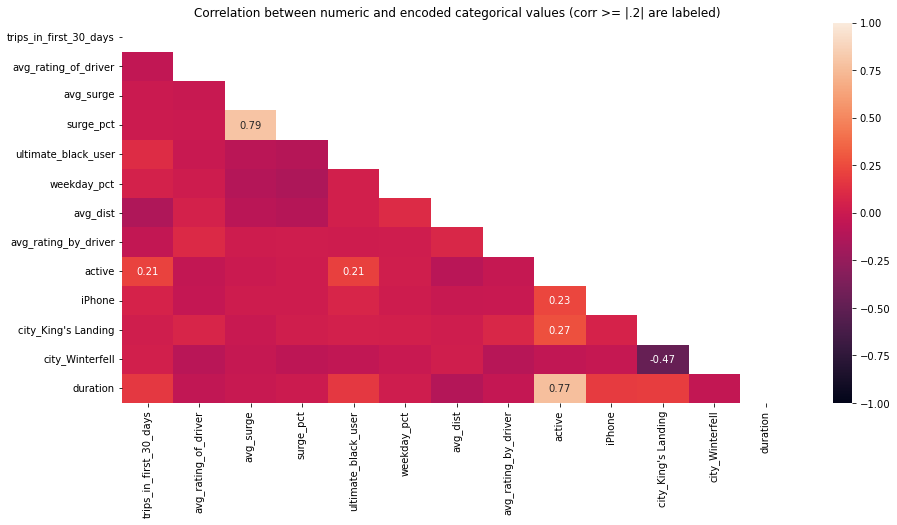

In [227]:
mask = (df.corr()>=.2) | (df.corr()<=-.2)
annotations = np.array(round(df.corr(), 2)[mask].astype(str))
annotations[np.isnan(df.corr()[mask])] = ""

matrix = np.triu(df.corr())

plt.figure(figsize=(15,7))
x = sns.heatmap(df.corr(), annot=annotations, vmin=-1, vmax=1, fmt='', mask=matrix)
x.set_title('Correlation between numeric and encoded categorical values (corr >= |.2| are labeled)');

- Surge_pct and avg_surge are highly correlated, which isn't surprising.
- Similarly, there is high multicollinearity between encoded cities. Astapor will be dropped to see if this improves things.

In [177]:
# Drop Astapor
df.drop(columns='city_Astapor', inplace=True)

,city_Winterfell,city_King's Landing
city_Winterfell,1.000000,-0.471555
city_King's Landing,-0.471555,1.000000


In [184]:
num_cols2 = df.select_dtypes('number').columns
len(num_cols2)

12

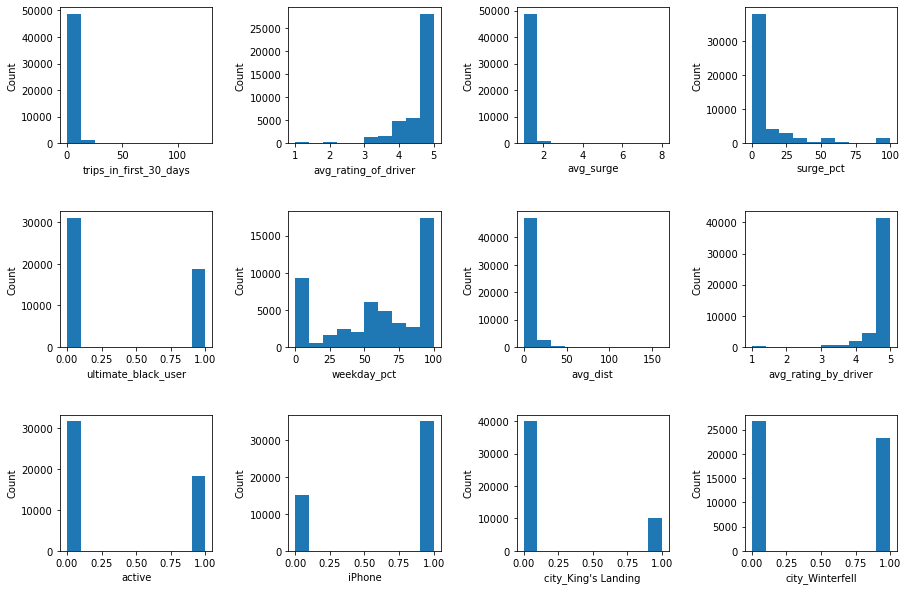

In [185]:
# Plot histograms of all columns (except datetime)

fig, axes = plt.subplots(3, 4, figsize=(15,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(num_cols2):
    ax = axes.flatten()[i]
    ax.hist(x=col, data=df)
    ax.set(xlabel=col, ylabel='Count')

Most ratings skew higher. Weekday pct is bimodal, with many users either taking most of their trips on the weekend, or most on weekdays.

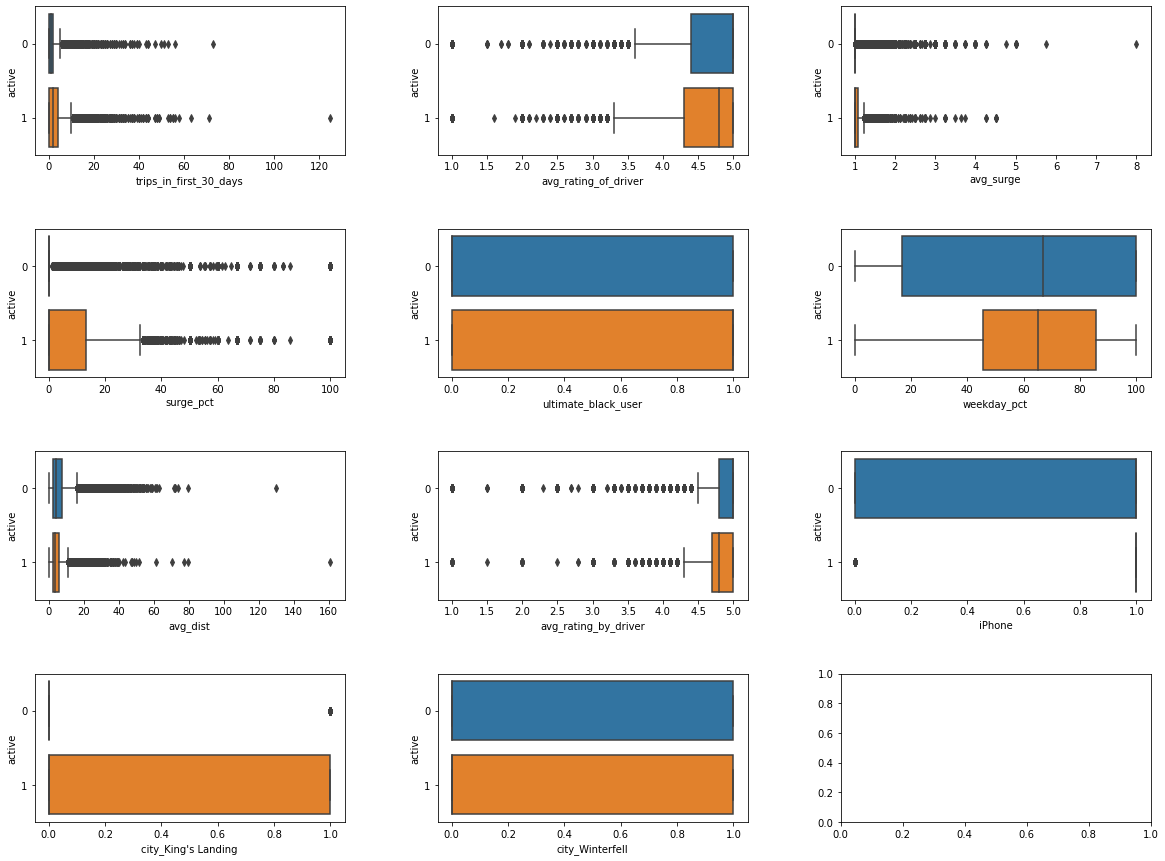

In [198]:
# Boxplots showing interaction between each col and target col

fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
for i, col in enumerate(num_cols2.drop('active')):
    ax = axes.flatten()[i]
    sns.boxplot(x=col, y='active', data=df, orient='h', ax=ax)

- Active users have a narrower range of weekday usage, although the medians of both active and inactive users are about the same.
- Active users have a slightly higher surge %
- Whether or not an ultimate black was taken has no bearing on active status
- Avg distance and rating doesn't differ too much between the two groups
- City Winterfell doesn't differ much in active status, whereas users from King's Landing are much more likely to be active users

## 4. Impute Remaining Null Values

In [193]:
total_na = df.isna().sum()
perc_na = total_na/len(df)*100

pd.DataFrame(
    {'Total NA':total_na, '% NA':perc_na}
)

,Total NA,% NA
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_rating_of_driver,8122,16.244
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
avg_rating_by_driver,201,0.402


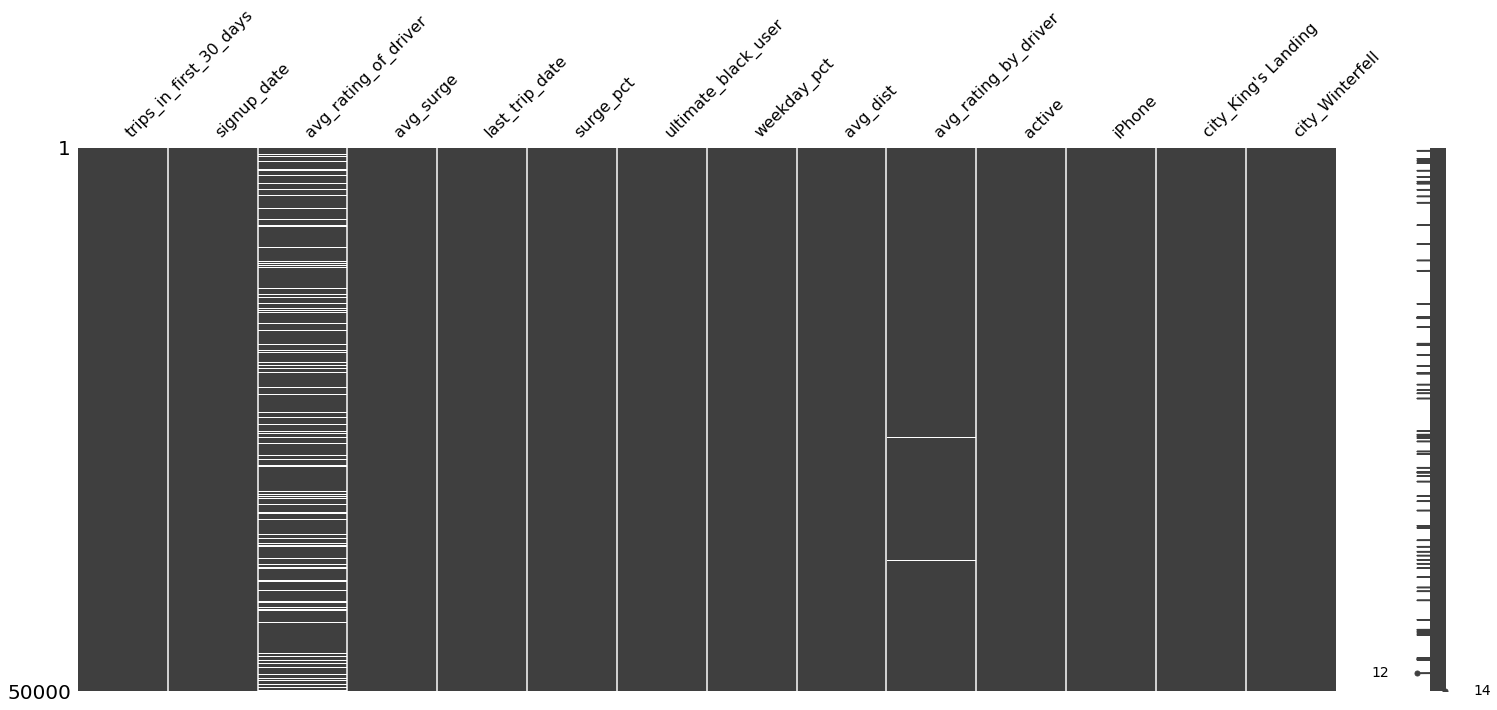

In [199]:
msno.matrix(df);

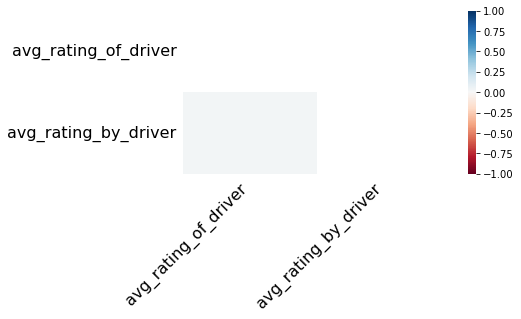

In [200]:
msno.heatmap(df, figsize=(6,3));

There doesn't seem to be any specific pattern to missing values of avg_rating_of_driver, so we can probably rely on simpler imputation techniques.

In [207]:
# Split into test/train prior to mean or median imputation

train, test = train_test_split(df)
train.shape, test.shape

((37500, 14), (12500, 14))

In [208]:
train[['avg_rating_of_driver', 'avg_rating_by_driver']].describe()

,avg_rating_of_driver,avg_rating_by_driver
count,37500.000000,37500.000000
mean,4.651803,4.779085
std,0.574251,0.442268
min,1.000000,1.000000
25%,4.500000,4.700000
50%,4.900000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


The average and median rating for both categories is very high, and the std is small. Based on our boxplots, both cols are fairly skewed, so they will be imputed with the median. Test set will be imputed with median of train set.

In [209]:
# Driver Rating
train['avg_rating_of_driver'].fillna(train['avg_rating_of_driver'].median(), inplace=True)
test['avg_rating_of_driver'].fillna(train['avg_rating_of_driver'].median(), inplace=True)

# Passenger Rating
train['avg_rating_by_driver'].fillna(train['avg_rating_by_driver'].median(), inplace=True)
test['avg_rating_by_driver'].fillna(train['avg_rating_by_driver'].median(), inplace=True)

C:\Users\divzu\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [210]:
train[['avg_rating_of_driver', 'avg_rating_by_driver']].describe()

,avg_rating_of_driver,avg_rating_by_driver
count,37500.000000,37500.000000
mean,4.651803,4.779085
std,0.574251,0.442268
min,1.000000,1.000000
25%,4.500000,4.700000
50%,4.900000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [212]:
train.isna().sum(), test.isna().sum()

(trips_in_first_30_days    0
 signup_date               0
 avg_rating_of_driver      0
 avg_surge                 0
 last_trip_date            0
 surge_pct                 0
 ultimate_black_user       0
 weekday_pct               0
 avg_dist                  0
 avg_rating_by_driver      0
 active                    0
 iPhone                    0
 city_King's Landing       0
 city_Winterfell           0
 dtype: int64,
 trips_in_first_30_days    0
 signup_date               0
 avg_rating_of_driver      0
 avg_surge                 0
 last_trip_date            0
 surge_pct                 0
 ultimate_black_user       0
 weekday_pct               0
 avg_dist                  0
 avg_rating_by_driver      0
 active                    0
 iPhone                    0
 city_King's Landing       0
 city_Winterfell           0
 dtype: int64)

Confirmed all missing values are taken care of. Now, save dataset for modeling stage.

In [214]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)